(0.0, 80889.66714410717)

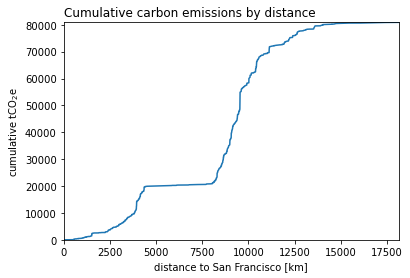

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

## read data
path = "~/git/CarbonFootprintAGU/data/"
df = pd.read_csv(path+"locations.csv")
nlocs = len(df)

## TOTAL
emissions = np.empty(nlocs)              # total emissions per location
distances = np.empty(nlocs)

for i in range(nlocs):
    n = df["N"][i]*(28/24)               # scale up from presenters to all attendees
    dist = df["dist"][i]

    if dist < 400:       # BUS / TRAIN / CAR at 60gCO2e / km / person
        e = dist*2*n*0.06      # kgCO2e
    elif dist < 1500:    # SHORT HAUL FLIGHT at 200gCO2e / km / person
        e = dist*2*n*0.2
    elif dist < 8000:    # LONG HAUL FLIGHT at 250gCO2e / km / person
        e = dist*2*n*0.25
    else:                # SUPER LONG HAUL at 300gCO2e / km / person
        e = dist*2*n*0.3

    emissions[i] = e
    distances[i] = dist

## sort them
sortarg = np.argsort(distances)
e_sorted = np.array(emissions)[sortarg]/1000  # tCO2e
d_sorted = np.array(distances)[sortarg]

ccarbon = np.cumsum(e_sorted)
cdistan = np.cumsum(d_sorted)

plt.plot(d_sorted,ccarbon)
plt.ylabel(r"cumulative tCO$_2$e")
plt.xlabel("distance to San Francisco [km]")
plt.title("Cumulative carbon emissions by distance",loc="left")
plt.xlim(0,d_sorted[-1])
plt.ylim(0,ccarbon[-1])